In [1]:
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, _LRScheduler
from torch.optim import AdamW
import math
from rigl_torch.datasets import get_dataloaders
from rigl_torch.optim import StepLrWithLinearWarmUp


INFO:/home/condensed-sparsity/src/rigl_torch/models/model_factory.py:Registering mnist for mnist dataset to ModelFactory...
INFO:/home/condensed-sparsity/src/rigl_torch/models/model_factory.py:Registering resnet18 for cifar10 dataset to ModelFactory...
INFO:/home/condensed-sparsity/src/rigl_torch/models/model_factory.py:Registering wide_resnet22 for cifar10 dataset to ModelFactory...
INFO:/home/condensed-sparsity/src/rigl_torch/models/model_factory.py:Registering cond_net for mnist dataset to ModelFactory...
INFO:/home/condensed-sparsity/src/rigl_torch/models/model_factory.py:Registering wide_resnet22 for imagenet dataset to ModelFactory...
INFO:/home/condensed-sparsity/src/rigl_torch/models/model_factory.py:Registering resnet18 for imagenet dataset to ModelFactory...
INFO:/home/condensed-sparsity/src/rigl_torch/models/model_factory.py:Registering resnet50 for imagenet dataset to ModelFactory...


In [2]:
from rigl_torch.datasets import get_dataloaders
from omegaconf import DictConfig
from rigl_torch.models import ModelFactory
import hydra

with hydra.initialize(config_path="../configs"):
    cfg = hydra.compose(config_name="config.yaml", overrides=["dataset=cifar10", "model=wide_resnet22"])
cfg

net = ModelFactory.load_model("wide_resnet22", "cifar10")

/tmp/ipykernel_668963/280303579.py:6: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with hydra.initialize(config_path="../configs"):
INFO:/home/condensed-sparsity/src/rigl_torch/models/model_factory.py:Loading model wide_resnet22/cifar10 using <function get_wide_resnet_22 at 0x7fe20b99a4c0> with args: () and kwargs: {}


In [3]:
import torchvision
cifar = torchvision.datasets.CIFAR10(root="../data/", download=True)

Files already downloaded and verified


In [4]:
len(cifar)

50000

In [5]:
train, test = get_dataloaders(cfg)

Files already downloaded and verified


In [6]:
cfg.training.batch_size

32

In [7]:
len(train)

1562

In [8]:
len(train.dataset)

50000

In [9]:
len(train.dataset) / cfg.training.batch_size

1562.5

In [10]:
for imgs,labels in train:
    break

In [11]:
import torch
from rigl_torch.optim import get_lr_scheduler, get_optimizer
optim = get_optimizer(cfg, net, None)
lr_scheduler = get_lr_scheduler(cfg, optim, None)



# adamw1 = AdamW(net.parameters(), lr=0.001)
# adamw2 = AdamW(net.parameters(), lr=0.001)
# linear_step = torch.optim.lr_scheduler.StepLR(adamw2, step_size=30000, gamma=0.2)
# cawr = CosineAnnealingWarmRestarts(optimizer=adamw1, T_0=20, T_mult=2)
# ca = CosineAnnealingLR(optimizer=adamw2, T_max=T_max)
# adamw3 = AdamW(net.parameters(), lr=0.001)
# test= CosineAnnealingWithLinearWarmUp(optimizer=adamw3, T_max=T_max, warm_up_steps=50, lr=0.001)

In [12]:
# lr_scheduler.get_last_lr()

In [13]:
# lr_scheduler.step_size

In [1]:
%matplotlib inline
lrs=[]
step_lrs=[]
# from torch.optim.lr_scheduler import StepLR
# step_scheduler = StepLR(optim, step_size=30, gamma=0.1)
for epoch in range(0,100):
    # lr = [group["lr"] for group in optim.param_groups][0]
    lr=lr_scheduler.get_last_lr()[0]
    lrs.append(lr)
    lr_scheduler.step()
    # lr = [group["lr"] for group in optim.param_groups][0]
    # step_lrs.append(lr)
    # step_scheduler.step()

# for x in range(T_max):
#     lr1 = cawr.get_last_lr()
#     warm_restart_lrs.append(lr1)
#     cawr.step()
#     lr2 = linear_step.get_last_lr()
#     linear_step_lrs.append(lr2)
#     linear_step.step()
    # combined.append(lr1[0] * lr2[0]*1000)
    # lr3 = test.get_last_lr()
    # linear_warmup.append(lr3)
    # test.step()

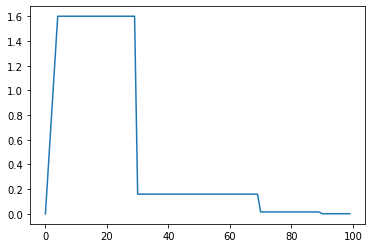

In [15]:
import matplotlib.pyplot as plt

plt.plot(lrs)
# plt.plot(step_lrs)
# plt.plot(combined)
# plt.plot(linear_warmup)

In [16]:
lrs[28:32]

[[1.6], [1.6], [0.16000000000000003], [0.16000000000000003]]

In [17]:
lrs[30]

[0.16000000000000003]

In [ ]:
from rigl_torch.models import get_model
from rigl_torch.datasets import get_dataloaders
from omegaconf import DictConfig
import hydra

In [ ]:
with hydra.initialize(config_path="../configs"):
    cfg = hydra.compose(config_name="config.yaml", overrides=[])
cfg

In [ ]:
def print_image_shape(module, input, output):
    print(f"Module {module._get_name()}")
    print(f"input shape: {input[0].shape} output shape: {output.shape}")
    return output